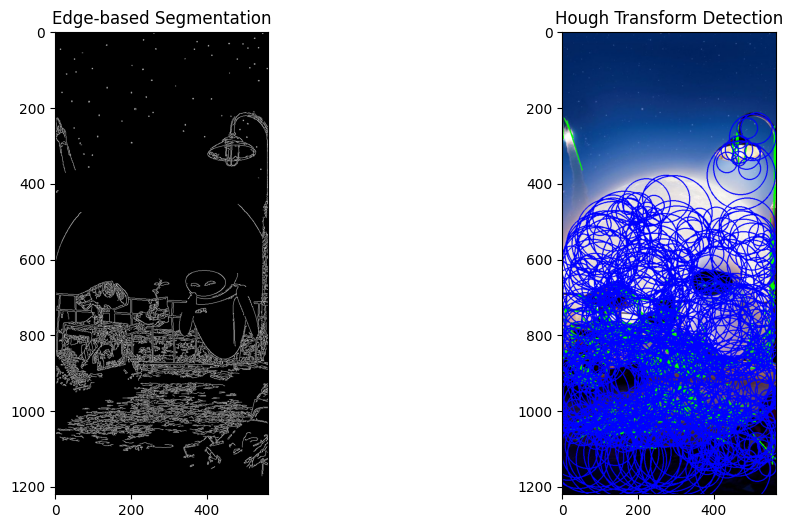

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/258a6ec2e12ec7f4b193ad25e439d463.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=100)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(edges, cmap='gray'), plt.title("Edge-based Segmentation")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Hough Transform Detection")
plt.show()


0: 640x320 (no detections), 138.4ms
Speed: 4.1ms preprocess, 138.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 320)


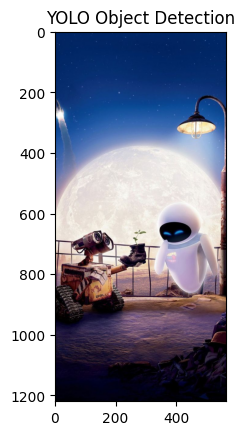

In [20]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")

image_path = "/content/258a6ec2e12ec7f4b193ad25e439d463.jpg"
image = cv2.imread(image_path)

results = model(image)

for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("YOLO Object Detection")
plt.show()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 200ms/step - accuracy: 0.1963 - loss: 3.5036 - val_accuracy: 0.2911 - val_loss: 2.8113
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 354s 221ms/step - accuracy: 0.3427 - loss: 2.5422 - val_accuracy: 0.3191 - val_loss: 2.7207
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 348s 222ms/step - accuracy: 0.4061 - loss: 2.2506 - val_accuracy: 0.3309 - val_loss: 2.7185
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 380s 221ms/step - accuracy: 0.4485 - loss: 2.0197 - val_accuracy: 0.3369 - val_loss: 2.7916
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 345s 221ms/step - accuracy: 0.5080 - loss: 1.7913 - val_accuracy: 0.3426 - val_loss: 2.8506
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


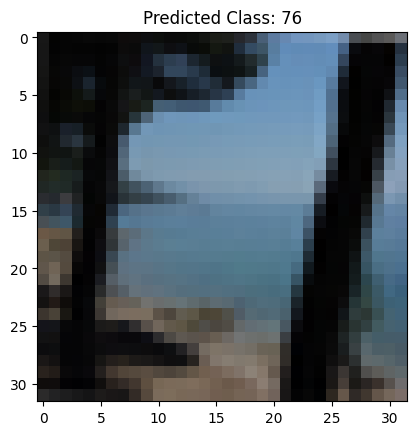

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(100, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

image = x_test[10]
pred = model.predict(image.reshape(1, 32, 32, 3))
pred_class = pred.argmax()

plt.imshow(image)
plt.title(f"Predicted Class: {pred_class}")
plt.show()